<h1><font color="#004D7F" size=5>Space Apps COVID-19 Challenge</font></h1>

<img width="256" src="data/img/covid.png" align="right">

<h2><font color="#004D7F" size=5>Human Factors</font></h2>


<br><br>
<div style="text-align: left">
<h4><font color="#004D7F" size=3>Authors</font></h4><br>
<font color="#004D7F" size=3><a href="https://www.linkedin.com/in/cifucg">Cristian Cifuentes</a><br>
<font color="#004D7F" size=3><a href="https://linkedin.com/in/jmnavegomez">Jose Manuel Naveiro</a><br>
<font color="#004D7F" size=3><a href="https://www.linkedin.com/in/andres-hidalgo-aa487a6b">Andrés Hidalgo</a>

---

<a id="indice"></a>
<h2><font color="#004D7F" size=5>Index</font></h2>

* [1. Introduction](#section1)
* [2. Requirements](#section2)
* [3. Human Factors](#section3)
    * [3.1 Population Density](#section31)
    * [3.2 Transport](#section32)
    * [3.3 Environment](#section33)
* [4. Conclusions](#section4)

---

<a id="section1"></a>
## <font color="#004D7F"> 1. Introduction</font>

<h3><center>The Challenge</center></h3>

The emergence and spread of infectious diseases, like COVID-19, are on the rise. Can you identify patterns between population density and COVID-19 cases and identify factors that could help predict hotspots of disease spread?

<h3><center>Explanation</center></h3>

The emergence and spread of infectious diseases, like COVID-19, may well continue. Many factors, both environmental and anthropogenic, can contribute to this trend. This challenge explores human activities that may be directly or indirectly related to the spread of COVID-19 locally and around the globe.

Numerous factors can contribute to the spread of infectious diseases, including but not limited to: trade and travel, social activities that increase one’s risk of exposure, and the lack of proper hygiene infrastructure. Do geographic or temporal patterns from COVID-19 disease mapping reveal insights into human factors that may be related to the spread of the disease? Could human activities that impact the environment play an indirect role in furthering COVID-19 spread? Are certain activities correlated with specific disease presentations or increased severity?

Your challenge is to identify patterns between human activity and COVID-19 cases and identify factors that could help predict hotspots of disease spread.

<img src="data/img/human_factors.jpg" align="center" width="720">

<h3><center>Considerations</center></h3>

* Consider measuring density during COVID-19 by integrating space-based assets (such as satellite communications and Earth observations) with Earth-based infrastructure (such as buildings) to identify potential COVID-19 hotspots
* You may consider clustering in urban cities versus rural areas
* Consider derived social determinants of health (SDOH), population activity densities due to weather and weather events, and the related SDOH effects on the transmission and predictions of COVID-19.
* Are specific activities related to increased number of susceptible or exposed populations? What factors increase a population’s vulnerability to disease?

---

<a id="section2"></a>
## <font color="#004D7F"> 2. Requirements</font>

This cell is intended for the import of the packages and libraries necessary for the development of the problem.

<div class="alert alert-block alert-danger">
    
<i class="fa fa-exclamation-triangle" aria-hidden="true"></i>
It is necessary to have all the libraries installed, most of them can be installed using the `pip` command in the terminal.
</div>

In [ ]:
##!pip install descartes

In [1]:
# Data processing libraries
import pandas as pd
import numpy as np
import math

# Libraries for the graphing of data
import matplotlib.pyplot as plt
import seaborn as sns;
sns.set()
import plotly.express as px
import plotly.graph_objects as go

# Allows graphics to be generated at higher resolution
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# Allows you to ignore the warnings in the notebook
import warnings
warnings.simplefilter('ignore')

# Set a wider notebook width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

# We import the library that allows us to work with dates
from datetime import datetime, timedelta

# For HTML embed, JS objects
from IPython.display import Javascript
from IPython.core.display import display, HTML

# Library to work with geo data
import geopandas as gpd
from geopandas.tools import geocode


We load the countries dataset into a geojson file and convert it into a *dataframe* of *pandas*. This operation has the purpose of allowing us to work in a faster and more efficient way with the data set, and thus, be able to make a good exploratory analysis of it.

In [2]:
world_map = gpd.read_file('./data/countries.geojson')
world_map.rename(columns={"ADMIN": "country", "ISO_A3": "country_code"}, inplace=True)
# Delete Antarctica
world_map = world_map[world_map['country']!='Antarctica']
# Correct names
world_map['country'] = world_map['country'].apply(lambda c: c.replace(" ", "_"))

We have collected different information to analyze and understand the coronavirus data of https://coronavirus.jhu.edu/map.html, https://data.europa.eu/euodp/en/data/dataset/covid-19-coronavirus-data, https://geohealth.hhs.gov/

In [3]:
df = pd.read_csv('./data/covid19-cases-worldwide.csv')
df['dateRep'] = df['dateRep'].apply(lambda d: datetime.strptime(d, "%d/%m/%Y").date())

Delete null or NaN values in the data

In [4]:
df.dropna(axis=0, inplace=True)

We renamed some of the variables and eliminated those that may be less interesting a priori

In [5]:
df.rename(columns={"dateRep": "date", "countriesAndTerritories": "countries", "popData2018": "population", "continentExp": "continent"}, inplace=True)

<div class="alert alert-block alert-warning">
    
<i class="fa fa-exclamation-triangle" aria-hidden="true"></i>
It is necessary to execute all the cells to be able to visualize the graphics since most of them are interactive.
</div>

---
<a id="section3"></a>
## <font color="#004D7F"> 3. Human Factors</font> 

Here you can see some of the records that make up our data.
We can see that we have the **date of registration**, the **cases**, the **deaths**, in which **country** these data have been obtained and then the **continent** to which this country belongs.
We also have geographical information such as the **country code** to reference it later with a geographical map and the level of **population** that presents the country of the corresponding record, but this last value refers to the year _2018_ so it is not fully updated but serves to give us an idea and to take it into consideration.

In [6]:
df.head()

date  day  month  year  cases  deaths    countries geoId  \
0  2020-05-30   30      5  2020    623      11  Afghanistan    AF   
1  2020-05-29   29      5  2020    580       8  Afghanistan    AF   
2  2020-05-28   28      5  2020    625       7  Afghanistan    AF   
3  2020-05-27   27      5  2020    658       1  Afghanistan    AF   
4  2020-05-26   26      5  2020    591       1  Afghanistan    AF   

  countryterritoryCode  population continent  
0                  AFG  37172386.0      Asia  
1                  AFG  37172386.0      Asia  
2                  AFG  37172386.0      Asia  
3                  AFG  37172386.0      Asia  
4                  AFG  37172386.0      Asia

Aquí podemos observar la distribución de las variables númericas, y poder comprobar de un simple vistazo si hay valores que se escapan de la normalidad o todos los datos están correctos.
Por ejemplo, este caso se puede ver representado en los casos y las muertes que tenemos valores minimos inferiores al 0 debido a las correcciones que se han hecho en algunos paises, por lo que esto debemos corregirlo, estableciendolos a 0 cuando vayan a ser usados estos datos.

In [7]:
df.describe()

day         month          year         cases        deaths  \
count  19866.000000  19866.000000  19866.000000  19866.000000  19866.000000   
mean      16.415685      3.639787   2019.996678    296.942616     18.367210   
std        8.743235      1.375458      0.057545   1771.117081    125.668596   
min        1.000000      1.000000   2019.000000  -2461.000000  -1918.000000   
25%        9.000000      3.000000   2020.000000      0.000000      0.000000   
50%       17.000000      4.000000   2020.000000      3.000000      0.000000   
75%       24.000000      5.000000   2020.000000     50.000000      1.000000   
max       31.000000     12.000000   2020.000000  48529.000000   4928.000000   

         population  
count  1.986600e+04  
mean   5.018976e+07  
std    1.727964e+08  
min    1.000000e+03  
25%    2.119275e+06  
50%    9.630959e+06  
75%    3.369995e+07  
max    1.392730e+09

Ahora vamos a realizar un análisis sobre los casos que han ido confirmando cada uno de los continentes

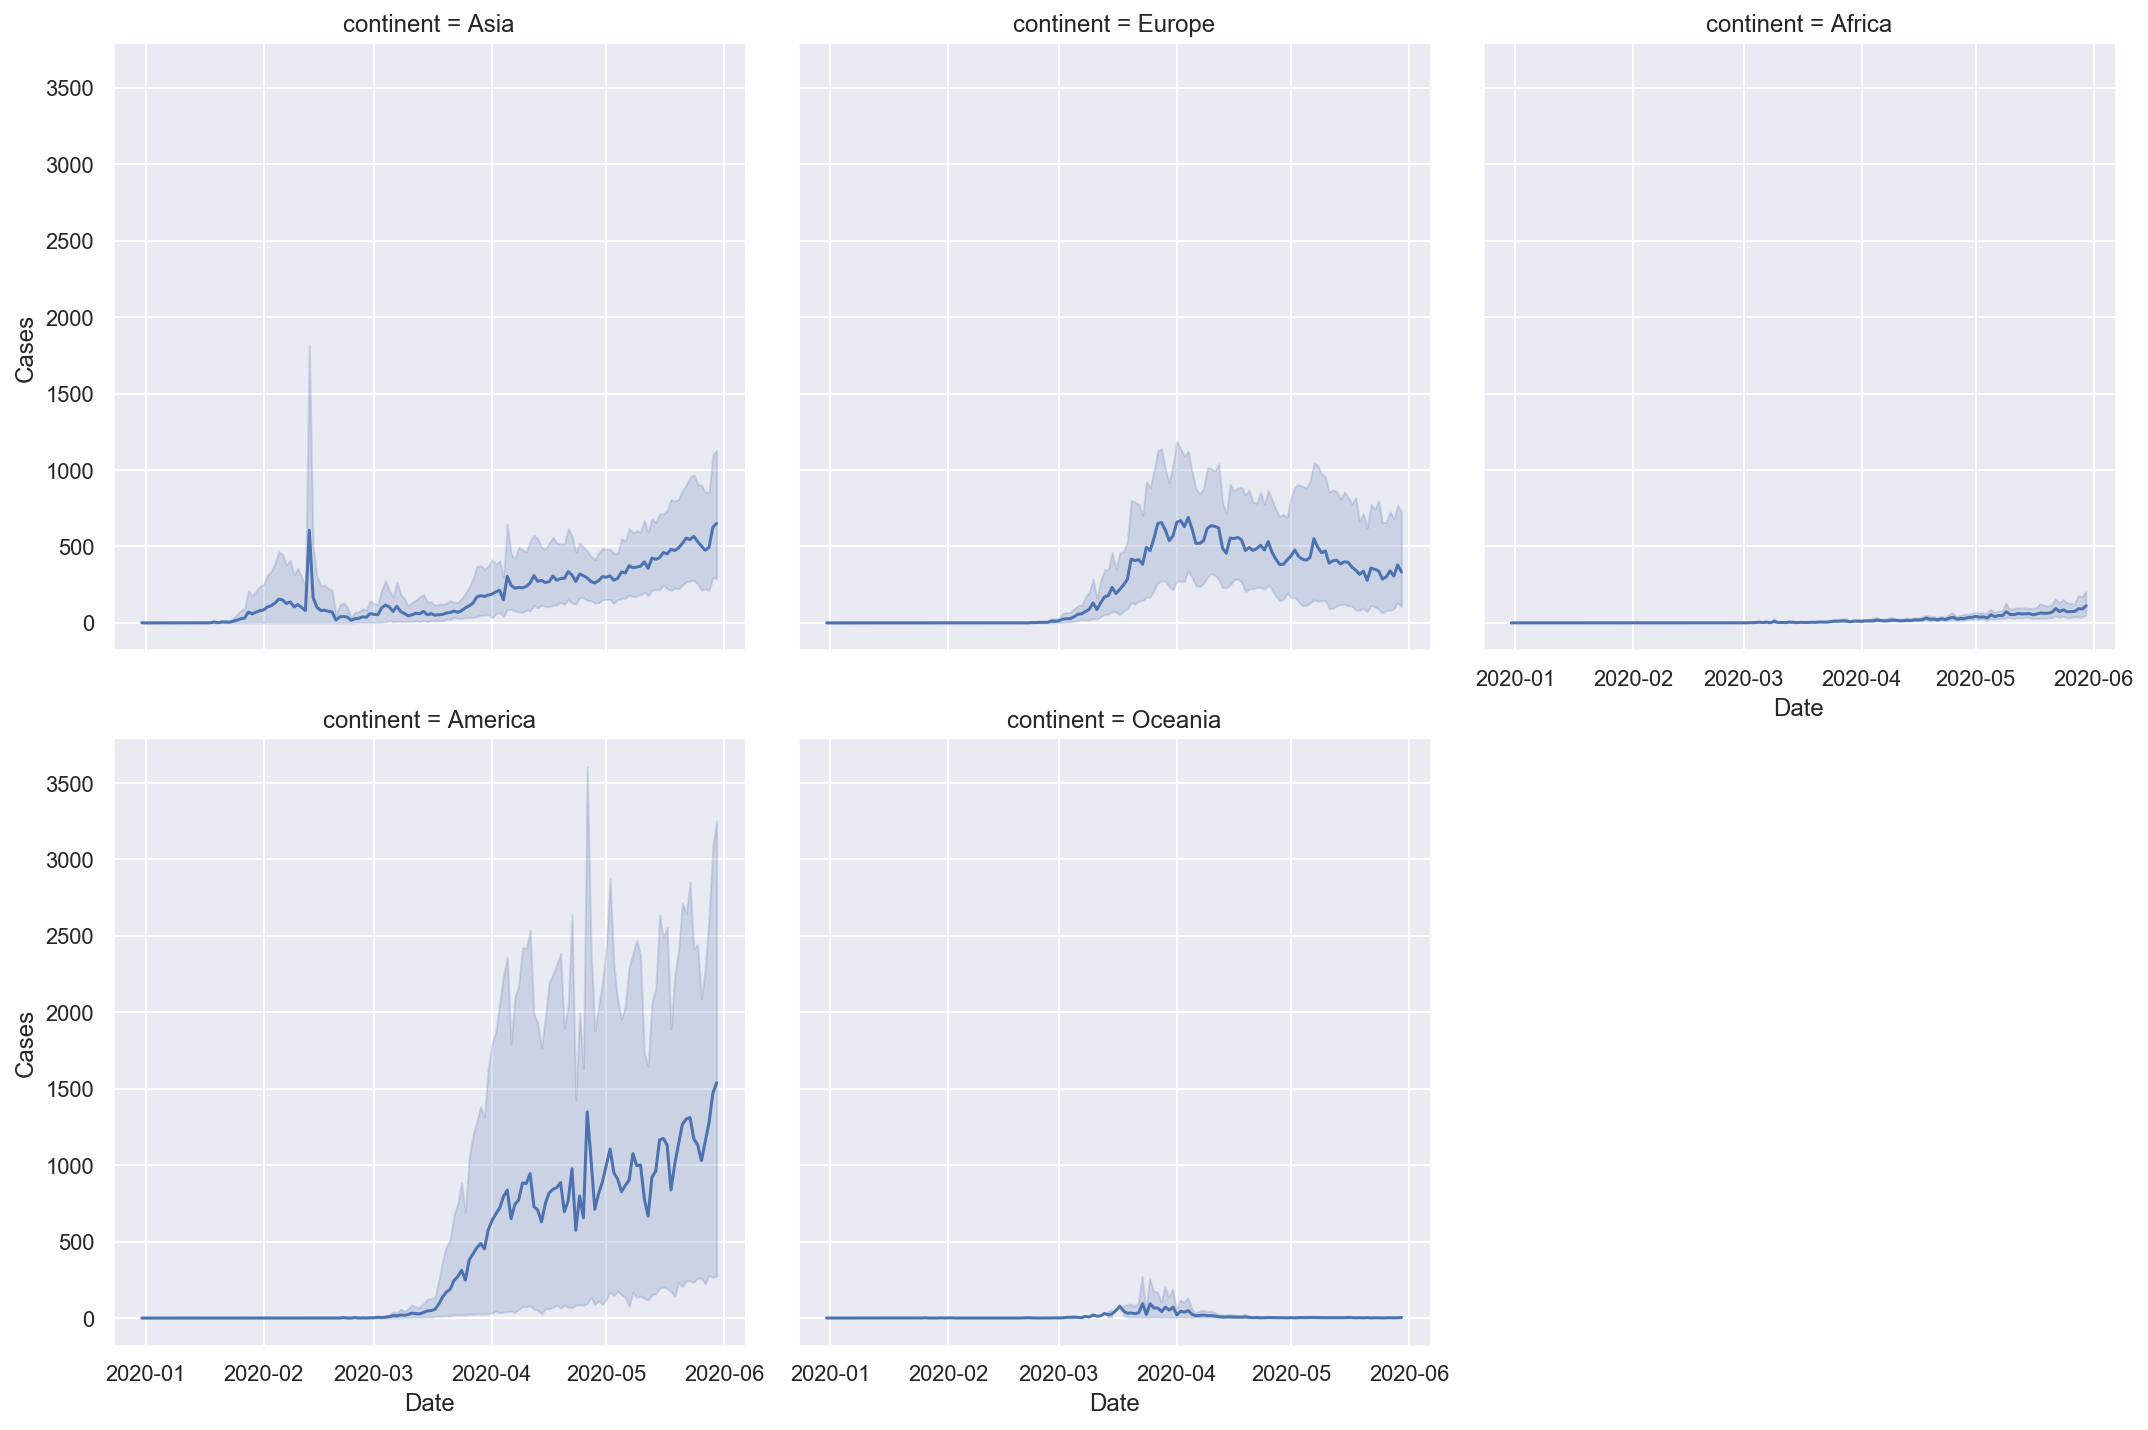

In [10]:
ax = sns.relplot(x="date", y="cases", col="continent", col_wrap=3, kind="line", data=df)
ax.set(xlabel='Date', ylabel='Cases');

En estas gráficas podemos observar que los continentes que más casos presentan a lo largo del tiempo son los que mayor densidad de población presentan como son **Asia**, **Europe** y **America**, mientras que los continentes restantes al presentar una densidad de población inferior a éstas, no presentan un alto número de casos pero estos valores no son nulos, por lo que también ha tenido incidencia el virus.

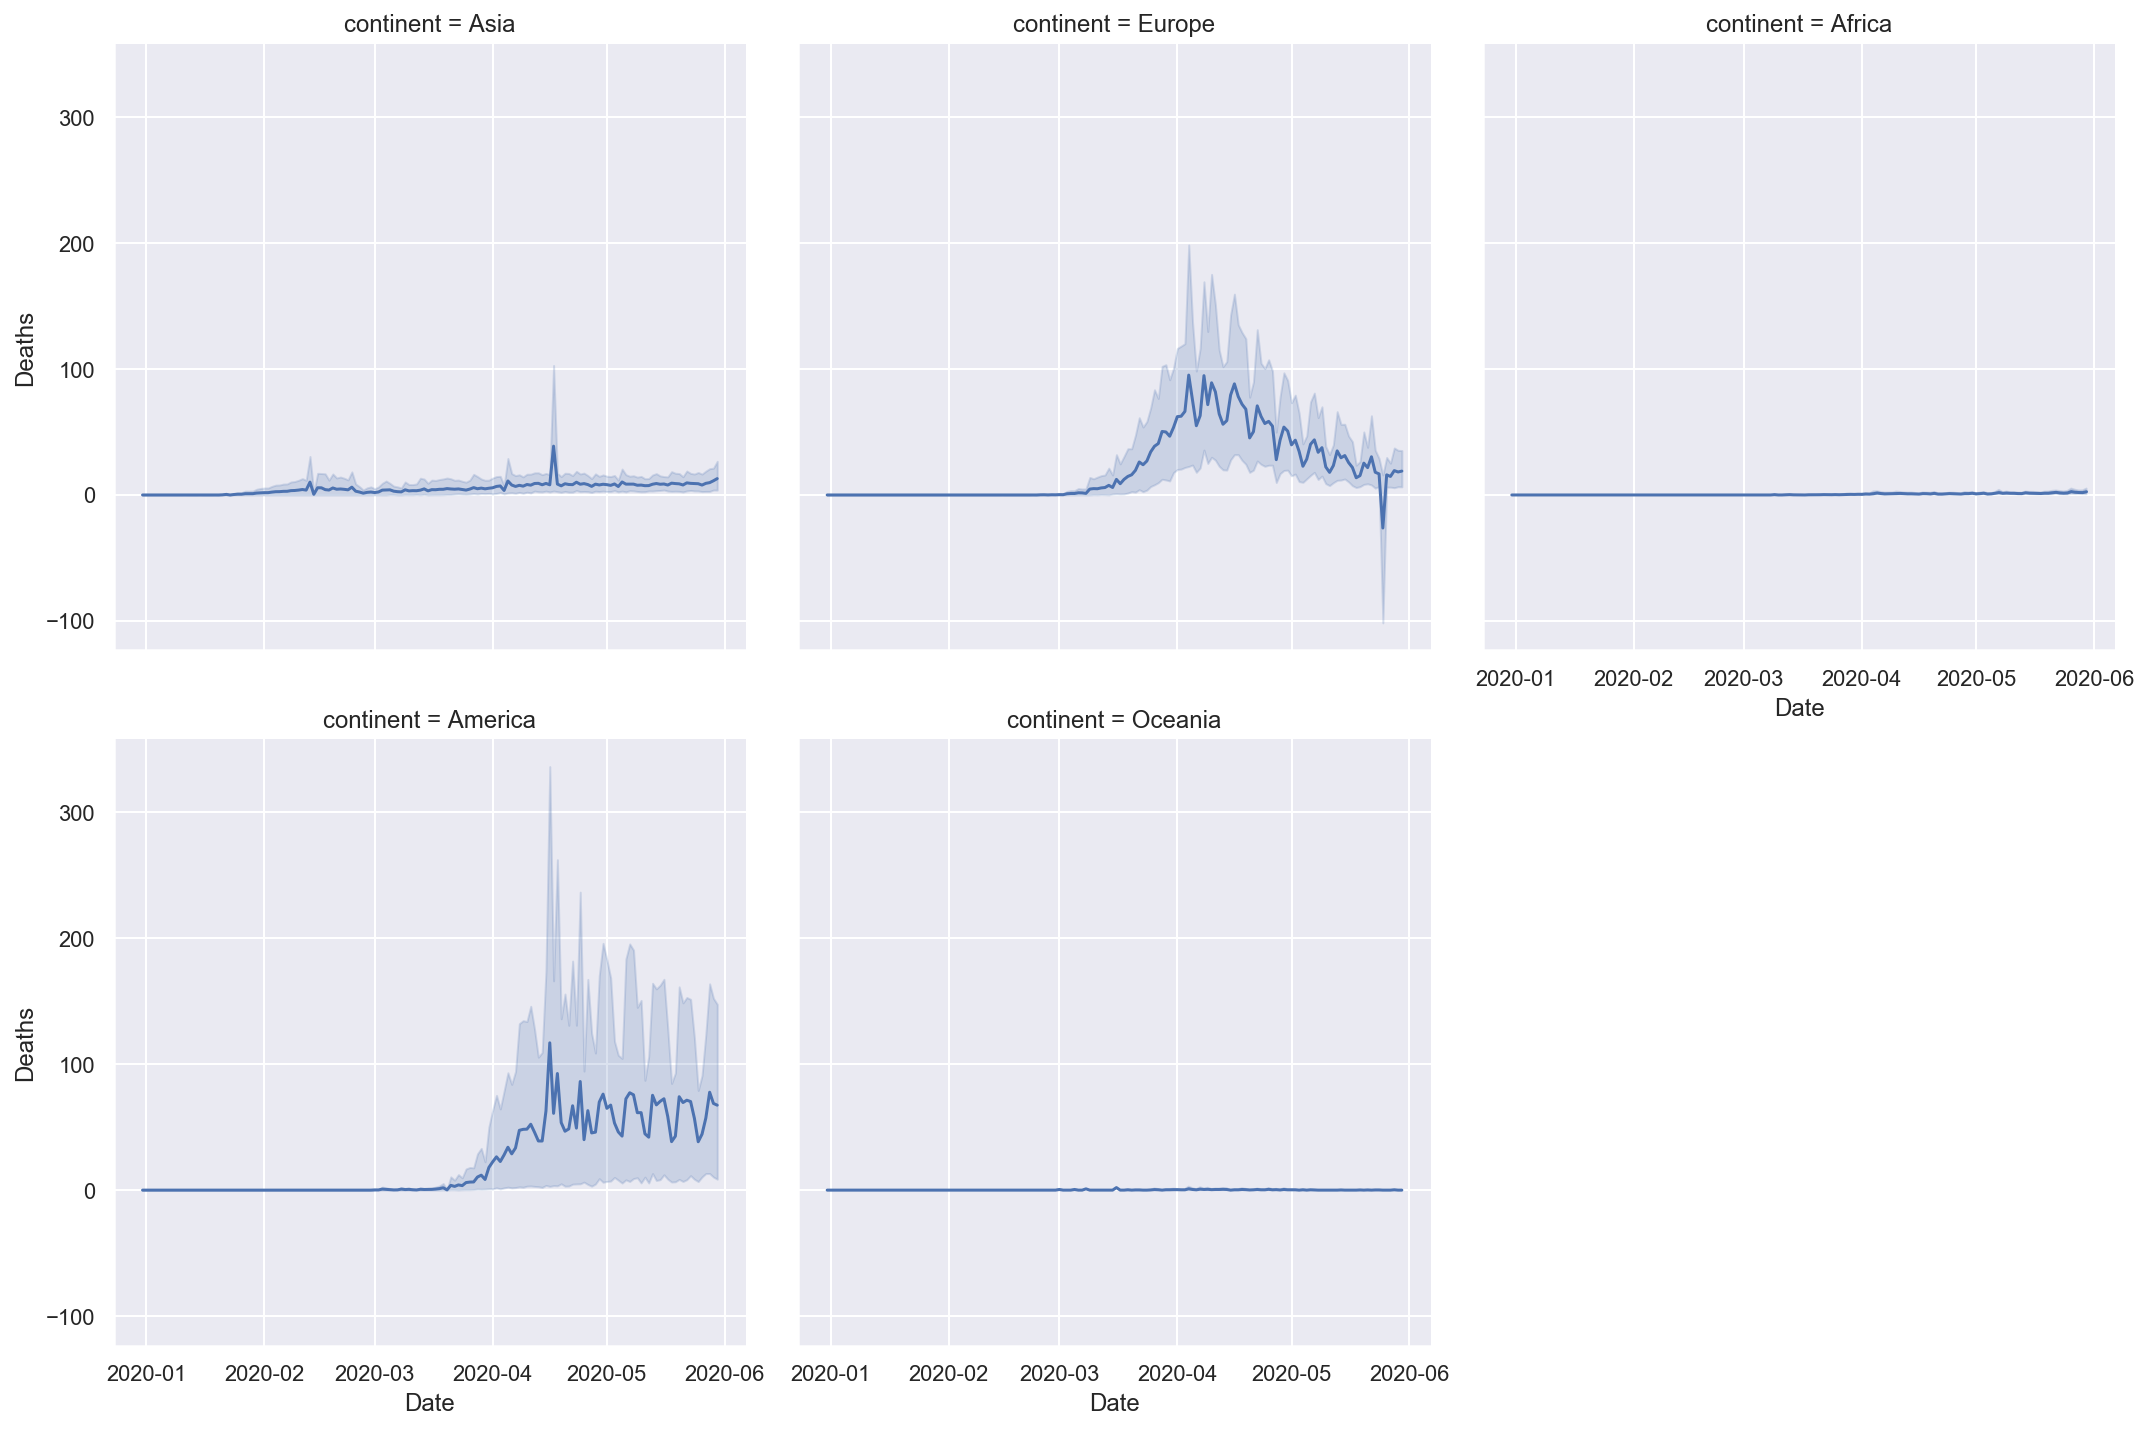

In [11]:
ax = sns.relplot(x="date", y="deaths", col="continent", col_wrap=3, kind="line", data=df)
ax.set(xlabel='Date', ylabel='Deaths');

En estas gráficas podemos comprobar lo mismo que sucede con el caso de los infectados confirmados por el virus, a mayor número de casos presentados, mayor número de muertes puede contener dicho continente.
Del mismo modo, los continentes que mayor densidad de población presentan, mayor número de muertes se han percibido.

<a id="section31"></a>
### <font color="#004D7F"> 3.1 Population Density</font> 

La idea es intentar analizar cada una de las poblaciones que presenta cada continente así como los casos y las muertes que presentan para poder demostrar que existe la relación que hemos comentado previamente.

In [12]:
dic_pop = {}
dic_cases = {}
dic_deaths = {}

for c in df.continent.unique():
    dic_pop[c] = (df[df.continent == c].groupby('countries')['population'].max().sum())
    dic_cases[c] = (df[df.continent == c].groupby('countries')['cases'].sum().sum())
    dic_deaths[c] = (df[df.continent == c].groupby('countries')['deaths'].sum().sum())
    
df_population = pd.DataFrame.from_dict(dic_pop, orient='index', columns=['population']).reset_index()
df_population.rename(columns={"index": "Continent", "population": 'Population'}, inplace=True)

df_cases = pd.DataFrame.from_dict(dic_cases, orient='index', columns=['cases']).reset_index()
df_cases.rename(columns={"index": "Continent", "cases": 'Cases'}, inplace=True)

df_death = pd.DataFrame.from_dict(dic_deaths, orient='index', columns=['deaths']).reset_index()
df_death.rename(columns={"index": "Continent", "deaths": 'Deaths'}, inplace=True)

df_continent = df_population.merge(df_cases, on="Continent")
df_continent = df_continent.merge(df_death, on="Continent")

Una vez tenemos toda la información agrupada vamos a intentar obtener la correlación entre población, contagiados y muertos por cada uno de los continentes.

In [13]:
df_continent

Continent    Population    Cases  Deaths
0      Asia  4.468916e+09  1068544   29542
1    Europe  7.644023e+08  1917491  172421
2    Africa  1.268520e+09   135064    3922
3   America  1.005667e+09  2769337  158866
4   Oceania  4.015206e+07     8626     132

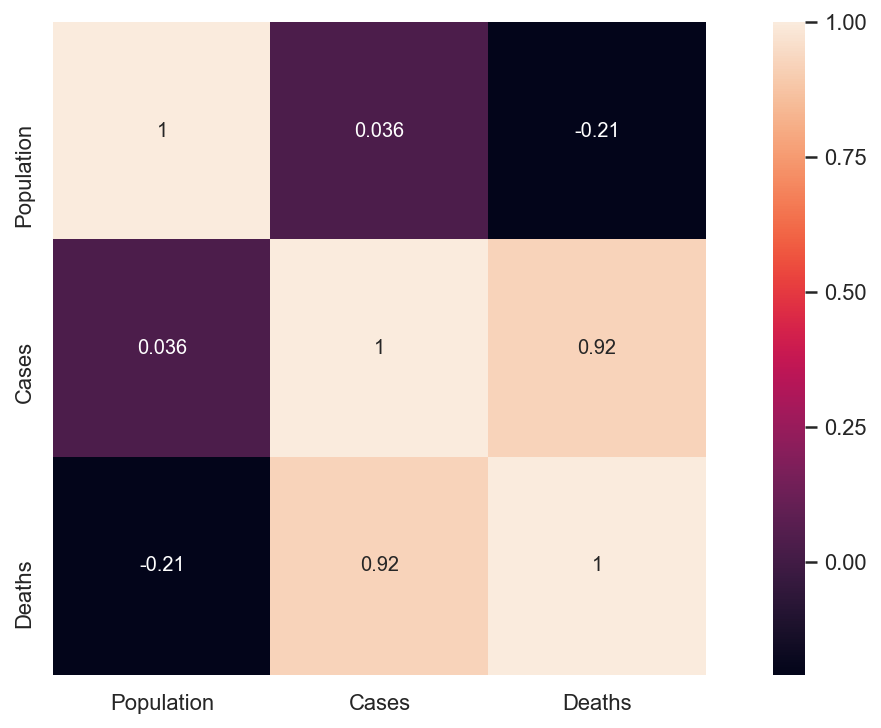

In [14]:
plt.figure(figsize=(12,6))
sns.heatmap(df_continent.corr(), square=True, annot = True)
plt.show()

Con la matriz de correlación obtenida entre las variables población, contagios y muertes, nos arroja la información de que entre **cases** y **deaths** hay una correlación directa. Esto es debido a que cuantos más casos de contagios se presenten mayor probabilidad hay de que se presenten caso de muertes, mientras que si no hay apenas casos de contagio o estos son mínimo es muy dificil que se presentes casos relacionados con las muertes. Con respecto a la variable **population** no podemos asegurar lo mismo, ya que tiene sentido decir que a mayor densidad de población mayor probabilidad de que haya contagios o muertes, pero realmente no tiene porqué ser así. Puesto que puede existir un continente que presente una alta densidad de población pero sin embargo se encuentren todos en zonas rurales y por lo tanto se encuentren repartidos a lo largo de toda la geografía de dicho continente. Favoreciendo con ello a la no propagación del virus y como consecuencia la disminución de casos y muertes.

A continuación vamos a analizar cada una de las poblaciones de los diferentes continentes y sus casos de contagio y muertes, para ver si obtenemos mayor información al respecto.

In [17]:
import plotly.express as px
fig = px.pie(df_continent, values='Population', names='Continent', title='Mundial population registry in 2018: '+ str(df_continent.Population.sum()) + '')
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.show()

Con respecto a estos gráficos podemos concluir que a menor densidad de población como es el caso de **Oceania** menor número de casos y contagios hay. Sin embargo, un continente como **Africa** que representa un **16.8%** de la población mundial tiene valores muy bajos con respecto a los contagios y muertes. Esto es poisible que sea por el subdesarrollo que presenta el continente o la baja influencia de vuelos o internacionalización que hay entre Africa y los demás continentes.

A continuación se va a hacer un análisis con respecto a los contagios y muertos que presentan en su totalidad actualmente cada uno de los continentes.

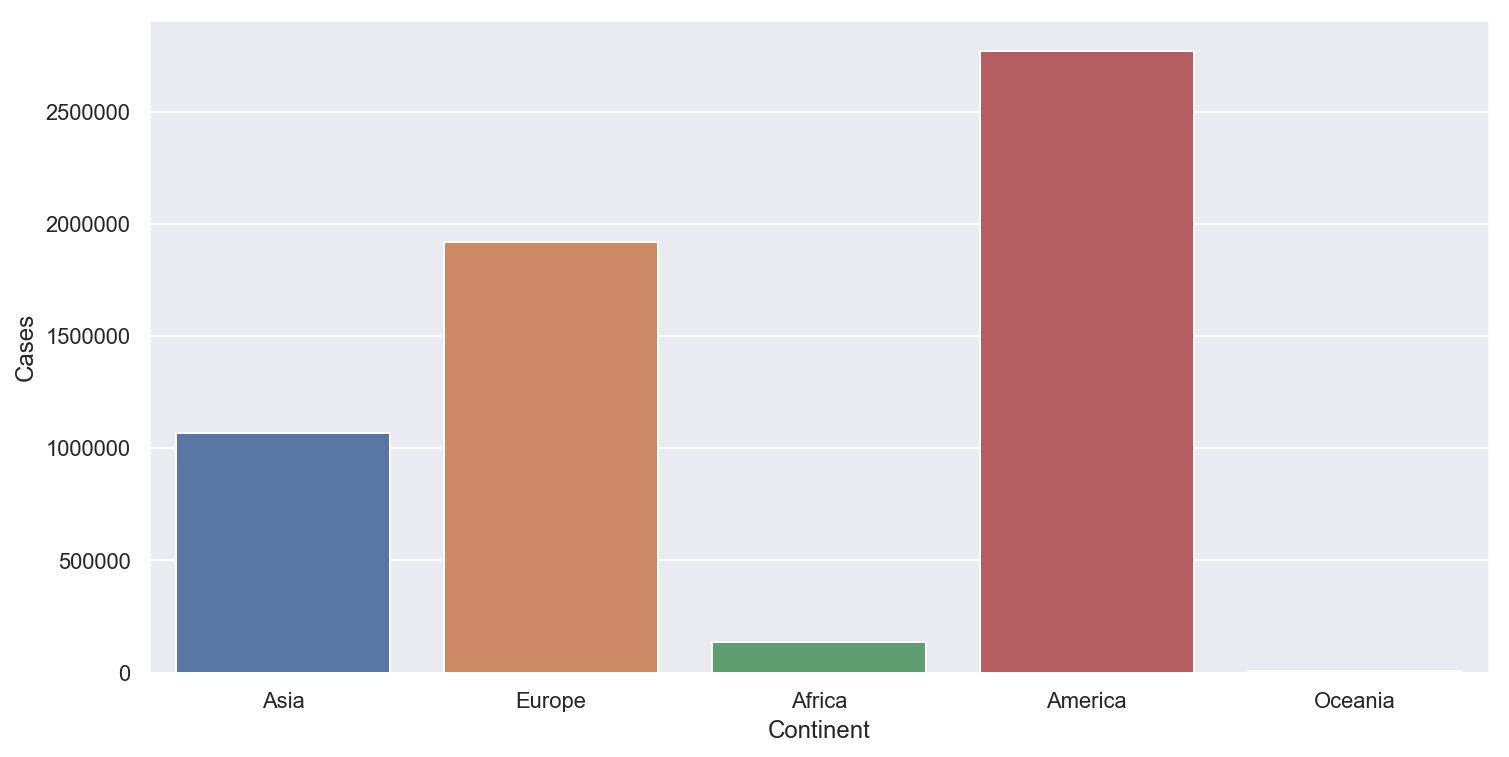

In [18]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x='Continent', y='Cases', data=df_continent)
plt.show()

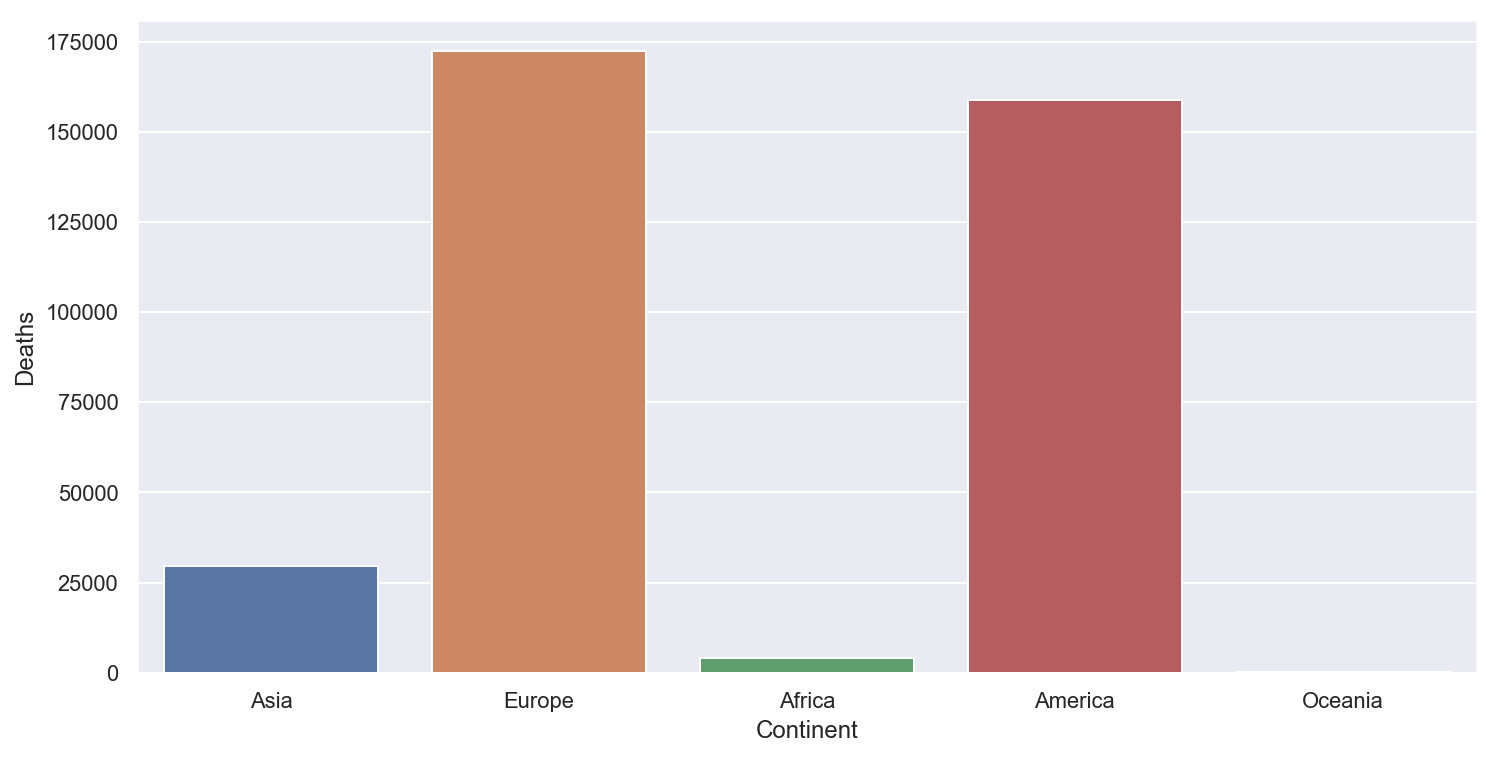

In [19]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x='Continent', y='Deaths', data=df_continent)
plt.show()

A continación vamos a hacer uso de los datos geográficos obtenidos para ver que continentes o paises se encuentran afectados por el virus actualmente.

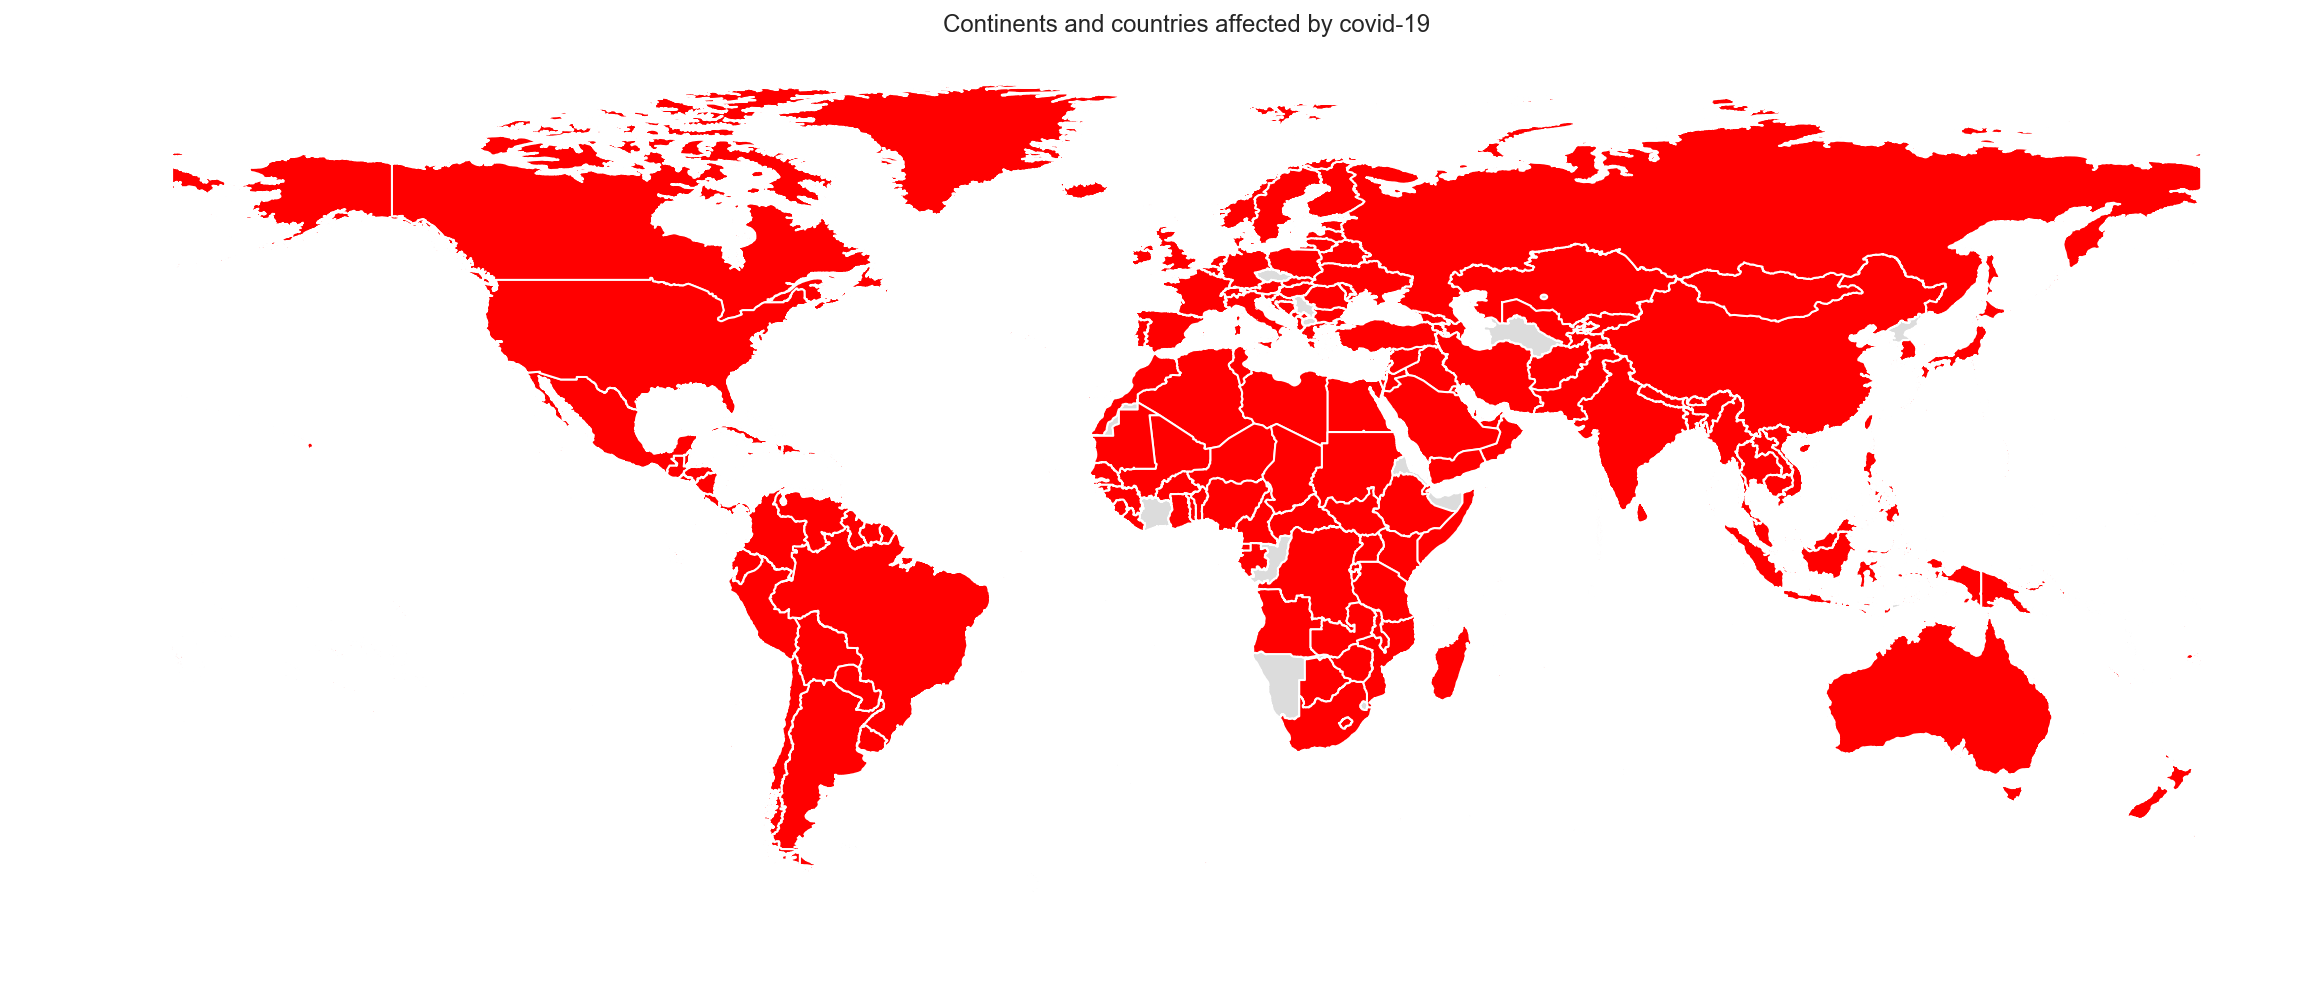

In [20]:
covid_countries = world_map[world_map['country'].isin(df['countries'].unique())]

fig, ax = plt.subplots(figsize=(20, 12))
world_map.plot(ax=ax, color='gainsboro')
covid_countries.plot(ax=ax, color='red', markersize=10)
ax.set_title('Continents and countries affected by covid-19')
ax.set_axis_off()
plt.show()

Podemos ver que hay muy pocos paises que no se encuentran afectados por el virus o que actualmente no existe información al respecto, por lo que podemos concluir que efectivamente, estamos ante una pandemia a nivel global.

In [21]:
df_countries = df.groupby('countries')[['countryterritoryCode']].max()
df_countries['cases'] = df.groupby('countries')[['cases']].sum()
df_countries['deaths'] = df.groupby('countries')[['deaths']].sum()
df_countries['continent'] = df.groupby('countries')[['continent']].max()
df_countries = df_countries.reset_index()

Ahora vamos a intentar ver de un simple vistazo como se encuentra cada uno de los paises con respecto al **total de casos confirmados por COVID-19** en un mapa interactivo que nos permita posicionarnos sobre cada uno de los paises y ver a qué nivel de infección se encuentra.

Del mismo modo vamos a intentar ver como se encuentra cada uno de los paises con respecto al **total de muertes confirmadas por COVID-19** en un mapa interactivo que nos permita posicionarnos sobre cada uno de los paises.

En cada _burbuja_ se puede observar de qué país se trata, agrupando por _colores_ correspondiendo éste al continente al que se encuentran y el _tamaño_ de las burbujas representa el nivel de contagio o muertes con respecto al virus.

Como se ha comentado previamente, los **gráficos son interactivos** por lo que se puede _mover_ , _ampliar_ , conocer cifras más especificas al posicionarnos encima de un país o modificando la _leyenda_ para ocultar o mostrar información.

In [22]:
fig = px.scatter_geo(
    df_countries, 
    locations='countryterritoryCode',
    color='continent',
    hover_name='countries',
    size='cases',
    projection="natural earth",
    title='World COVID-19 Total Cases'
)
fig.show()

fig = px.scatter_geo(
    df_countries, 
    locations='countryterritoryCode',
    color='continent',
    hover_name='countries',
    size='deaths',
    projection="natural earth",
    title='World COVID-19 Total Deaths'
)
fig.show()

Hay algunos continentes como es el caso de **Oceania** y **Africa**, que como se comentó previamente presenta valores muy bajos tanto de contagiados como de muertos, por lo que parece da la sensación de que en el gráfico no están o no hay valores, pero realmente si se hace zoom en estas regiones e interactuamos con el continente podemos observar su información por pais.

Los mapas anteriormente mostrados hacen referencia a los casos totales y muertes por pais con respecto a los datos que se encuentran disponibles a día de hoy, pero sería interesante poder ver de una manera temporal como ha ido avanzando la pandemia a lo largo del globo terraqueo.

Es por eso, que los siguientes mapas nos permiten avanzar tanto de manera manual como secuencial por día desde el 31 de Diciembre de 2019 hasta el día de hoy.
Así el análisis es más detallado con respecto a los datos disponibles.

In [23]:
df_map_global = df.copy()
# Sort the data frame on date
df_map_global = df_map_global.sort_values(by=['date'])
# Convert date to string type
df_map_global['date'] = df_map_global.date.apply(lambda d: datetime(d.year, d.month, d.day).strftime('%Y-%m-%d'))
# Correct the values negatives
df_map_global[df_map_global['cases']<0] = 0 
df_map_global[df_map_global['deaths']<0] = 0 

In [24]:
fig = px.scatter_geo(
    df_map_global, 
    locations='countryterritoryCode',
    color='continent',
    hover_name='countries',
    size='cases',
    projection="natural earth",
    title='World COVID-19 Cases Per Day',
    animation_frame="date"
)
fig.show()

fig = px.scatter_geo(
    df_map_global, 
    locations='countryterritoryCode',
    color='continent',
    hover_name='countries',
    size='deaths',
    projection="natural earth",
    title='World COVID-19 Deaths Per Day',
    animation_frame="date"
)
fig.show()

Este tipo de observaciones son muy interesantes ya que aportan información extra. En concreto puede ser el caso de que al inicio los únicos casos que se encontraban registrados fueron en el continente asíatico, mientras que poco a poco se va propagando a lo largo de los continentes, y se puede observar cómo ello provoca el aumento de los casos de contagiados, y como consecuencia de ello, el aumento en los muertos por pais. Esto sucede sobretodo en los continentes más desarrollados debido a la cantidad de vuelos que hay y los diferentes medios que existen para poder cambiar entre continentes, y como consecuencia, se permite la propagación del virus hasta convertirlo en la actual pandemia.

Ahora vamos a analizar los paises que hayan sufrido mayor impacto y los relacionaremos con los eventos sufridos con respecto al cierre de fronteras o la declaración de estado de alarma. Este evento se podrá observar con una linea que divide verticalmente las gráficas en color salmon.

In [25]:
df_events = pd.read_csv('./data/events.txt', sep=',', parse_dates=['date'])
df_events['finish'] = df_events["date"] + timedelta(days=1)

In [26]:
df_countries_event = df[df['countries'].isin(df_events.countries)]

In [29]:
for c in df_events.countries:
    data = df_countries_event[df_countries_event['countries']==c]
    line = df_events[df_events['countries']==c]['date'].values[0]
    line2 = df_events[df_events['countries']==c]['finish'].values[0]
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=data['date'], y=data['cases'],
                        mode='lines',
                        name='Cases',fill='tozeroy'))
    
    fig.add_trace(go.Scatter(x=data['date'], y=data['deaths'],
                        mode='lines',
                        name='Deaths',fill='tozeroy'))
    
    fig.add_shape(
        # Line Vertical
        dict(
            type="rect",
            xref="x",
            yref="paper",
            x0=str(line),
            y0=0,
            x1=str(line2),
            y1=1,
            fillcolor="LightSalmon",
            opacity=0.5,
            layer="below",
            line_width=0,
        )
    )
    fig.update_layout(title='Evolution of cases and deaths for COVID-19 in '+ c)
    fig.show()

Como podemos observar la mayoría de los paises lanzaron el estado de alarma o confinaron a las personas antes de que éstos alcanzaran su pico de casos a lo largo del tiempo. Esto es sintoma de que a mayor tiempo de lanzar el estado de alarma, mayor número de contagios puede producir, y como consecuencia de ello, el aumento o la disminución de muertes. Por lo que es conveniente tomar medidas previamente a tener algún pico de infectados por cualquier tipo de virus y en el caso de que se vuelva a detectar picos o datos de contagios, tomar medidas aunque sean precipitadas ya que estamos hablando de vidas humanas.

---
<a id="section32"></a>
### <font color="#004D7F"> 3.2 Transport</font> 

Con respecto a las observaciones previas, creemos que uno de los principales factores de que la propagación haya sido tan rápida entre continentes, es gracias a  la cantidad de tráfico que se mueve a lo largo de la tierra, ya sea terrestre, marítimo o aéreo que hay todos los días. Es por ello, que creemos que puede ser una buena fuente de información observar la cantidad de vuelos que hay y cómo esto ha afectado a los contagios o la propagación del virus. Si hubiese información pública con respecto al resto de transportes se podría obtener mayor información al respecto y sacar mejores conclusiones, pero actualmente sólo se ha podido obtener con respecto al medio aéreo.

<img src="data/img/aeropuertos.png" width="720" align="center">

Como podemos observar en la imagen, existe actualmente una cantidad inmensa de aeropuertos en cada uno de los continentes por lo que es muy fácil propagar entre cada uno de estos contienentes el virus. Aún así vamos a intentar analizar una serie de datos obtenidos de vuelos y como han ido evolucionando estos años para ver si obtenemos más información al respecto

<img src="data/img/vuelos.png" width="720" align="center">

En concreto, hemos querido obtener información con respecto al aeropuerto de Madrid para ser algo más específicos, y como se demuestra en la imagen, un pais desarrollado como España tiene vuelos a lo largo de todos los continentes, por lo que si partimos del supuesto que en españa hubiese un brote del virus, y parte de esa población fuese viajando alrededor del mundo, en no más de unos meses podría estar todo el mundo contagíado. Lo cual es realmente lo que ha ocurrido, por lo que creemos que uno de los factores más importantes para la propagación es la gran cantidad de vuelos que existen entre continentes a día de hoy y la facilidad de propagarlo, ya que normalmente estos vuelos suelen ser de hasta 300 personas y con una duración de 6 a 12 horas.


A continuación vamos a cargar todos los datos obtenidos desde las siguientes fuentes: https://ansperformance.eu/data/, https://www.flightradar24.com/5.62,4.03/2 , https://www.flightconnections.com que hacen referencia a un los vuelos que se han realizado a lo largo de los últimos años, y cuantos de ellos son comerciales.

In [30]:
df_trafico_aereo_temporal = pd.read_csv('./data/COVID_7D_portal_Overview_Serie temporal.csv', parse_dates=['Date'])
df_trafico_aereo_temporal.rename(columns={'Daily new COVID-19 cases (7 day moving avg.)': "Cases"}, inplace=True)

In [31]:
df_trafico_comercial = pd.read_csv('./data/number-of-commercial-fli.csv', sep=';', parse_dates=['DateTime'])
df_trafico_comercial.rename(columns={'7-day moving average': "Cases", "DateTime": "Date", "Number of flights": "Flights"}, inplace=True)

In [32]:
df_trafico_total = pd.read_csv('./data/total-number-of-flights.csv', sep=';', parse_dates=['DateTime'])
df_trafico_total.rename(columns={'7-day moving average': "Cases", "DateTime": "Date", "Number of flights": "Flights"}, inplace=True)

In [33]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_trafico_aereo_temporal['Date'], y=df_trafico_aereo_temporal['2010'],
                    mode='lines',
                    name='2010'))
fig.add_trace(go.Scatter(x=df_trafico_aereo_temporal['Date'], y=df_trafico_aereo_temporal['2019'],
                    mode='lines',
                    name='2019'))
fig.add_trace(go.Scatter(x=df_trafico_aereo_temporal['Date'], y=df_trafico_aereo_temporal['2020'],
                    mode='lines',
                    name='2020'))
fig.add_trace(go.Scatter(x=df_trafico_aereo_temporal['Date'], y=df_trafico_aereo_temporal['Cases'],
                    mode='lines',
                    name='Daily COVID-19 Cases (7 day moving avg.)'))

fig.update_layout(title='Evolution of daily flights (7 day moving average)',yaxis_title='Flights')


fig.show()

En la anterior gráfica se pueden observar los promedios por fecha de cada uno de los vuelos que se hicieron a lo largo de los años 2010, 2019 y 2020, junto con los casos que se han ido detectando del COVID-19.

En el año 2010 hay un pico durante el mes de abril en el que se cancelaron alrededor de 100000 vuelos debido a una crisis volcanica. Para más información consultar el siguiente enlace https://es.wikipedia.org/wiki/Erupción_del_Eyjafjallajökull_de_2010.

Con respecto a los datos de los vuelos en 2020 junto con los casos de COVID19, sólo hay valores hasta el mes de Mayo, por lo que conforme vaya avanzando el tiempo se podrá observar nueva información.

Se puede apreciar como a partir del cierre de las fronteras aprobado por todos los paises a mediados de marzo, cayó en picado los vuelos aumentando proporcionalmente los casos detectados por el virus.

In [34]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df_trafico_comercial['Date'], y=df_trafico_comercial['Flights'],
                    mode='lines',
                    name='Number of commercial flights', fill='tozeroy'))

fig.add_trace(go.Scatter(x=df_trafico_comercial['Date'], y=df_trafico_comercial['Cases'],
                    mode='lines',
                    name='7 day moving average in commercial flights'))

fig.add_trace(go.Scatter(x=df_trafico_total['Date'], y=df_trafico_total['Flights'],
                    mode='lines',
                    name='Number of flights', fill='tozeroy'))

fig.add_trace(go.Scatter(x=df_trafico_total['Date'], y=df_trafico_total['Cases'],
                    mode='lines',
                    name='7 day moving average in total flights'))

fig.update_layout(title='Number of commercial and total flights tracked per day',yaxis_title='Number of flights')


fig.show()

En este gráfico se muestra el total de vuelos que se han producido a lo largo de este año y cómo a partir de Marzo comienza a bajar la tendencia.
Además, de todos esto vuelos podemos observar cuantos de éstos son vuelos comerciales, es decir, de personas y cómo esto puede afectar a la propagación del virus.

Si existiese la posibilidad de usar alguna herramienta que nos aportara mayor información con respecto a la cantidad de vuelos, cuantos pasajeros van en cada vuelo y hacia dónde dirije y su procedencia. Se podría analizar y hacer algun modelo que predijese posibles repuntes de pandemias o nuevas y cuales serían los poisibles focos.

A continuación vamos a hacer el analisis del tráfico aéreo como influencia en el virus.

In [35]:
df_dates = df.groupby('date')[['cases', 'deaths']].sum().reset_index()

In [36]:
df_dates_flights = pd.merge(df_dates, df_trafico_aereo_temporal['2020'], how='inner', left_index=True, right_index=True)
df_dates_flights.rename(columns={'2020': "flights"}, inplace=True)

In [37]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_dates_flights['date'], y=df_dates_flights['cases'],
                    mode='lines',
                    name='Cases'))
fig.add_trace(go.Scatter(x=df_dates_flights['date'], y=df_dates_flights['flights'],
                    mode='lines',
                    name='Flights'))

fig.update_layout(title='Evolution of daily flights and cases for COVID-19')

fig.show()

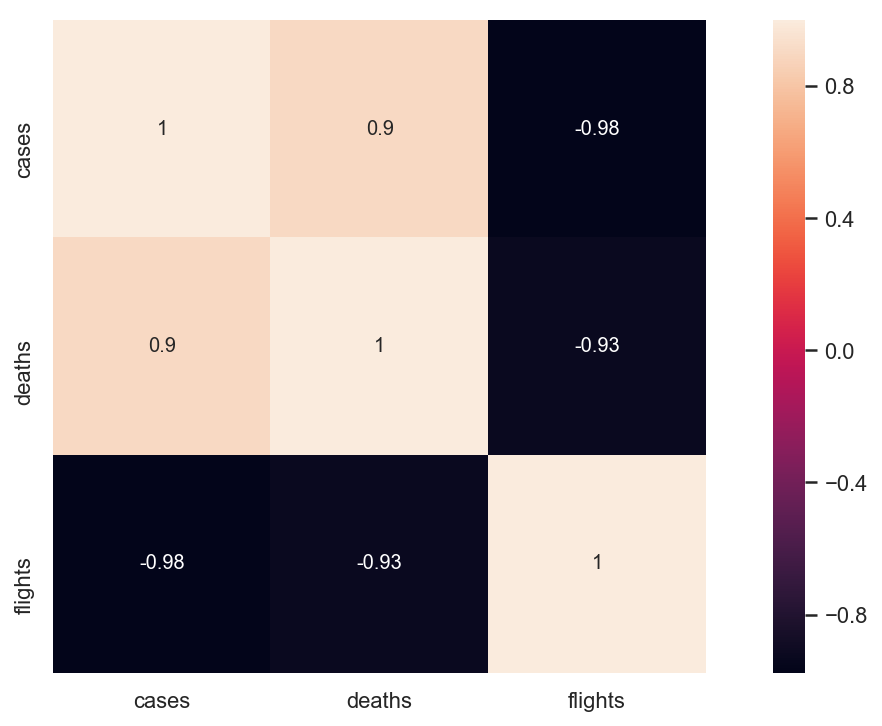

In [38]:
plt.figure(figsize=(12,6))
sns.heatmap(df_dates_flights.corr(), square=True, annot = True)
plt.show()

Podemos concluir con estas gráficas, que existe una correlación directa entre el numero de casos de contagios, de muertes y de vuelos producidos durante el inicio del año 2020. Como consecuencia de ello, al aumentar el número de contagiados y de muertes, se cierran las fronteras provocando que los vuelos disminuyan para intentar controlar el virus y que no siga propagandose.

Por lo que el aire y sobretodo los vuelos entre paises y más concretamente entre continentes, son un factor muy importante para evitar posibles pandemias o evitar rebrotes.

---
<a id="section33"></a>
### <font color="#004D7F">3.3 Environment</font> 

Creemos que el entorno así como el medioambiente es un factor crucial para la propagación del virus, también es u buen indicativo de que sucede con la población, mediante algunos valores como el **dióxido de carbono** (CO2) o el **dióxido de nitrógeno** (NO2). Ambos valores nos permiten hacernos una idea de cómo se encuentra el aire de contaminado, por lo que durante esta fase de confinamiento que estamos sufriendo, y en la cual, muchos paises han decretado el estado de alarma, deben haber bajado los niveles de estos dos compuestos.

Los datos de CO2 han sido obtenidos gracias a la **NASA** desde el siguiente enlace https://climate.nasa.gov/vital-signs/carbon-dioxide/.

In [39]:
df_co = pd.read_csv('./data/co2_mm_mlo.txt', sep='\s+', header=None)
df_co.columns = ['year', 'month', 'decimal_date', 'average', 'interpolated', 'trend', 'days']
df_co['date'] = df_co.apply(lambda r: datetime(year=int(r['year']), month=int(r['month']), day=28), axis=1)
df_co_copy = df_co[df_co['year']>=2004]

fig = go.Figure()
fig.add_trace(go.Scatter(x=df_co_copy['date'], y=df_co_copy['trend'],
                    mode='lines+markers'))

fig.update_layout(title='DIRECT MEASUREMENTS CO2: 2004-PRESENT', xaxis_title="Year", yaxis_title="CO2 (parts per million)")

fig.show()

En esta grafica podemos observar como los niveles de CO2 han ido aumentando a lo largo de la historia, es cierto, que a veces sufren altibajos debido a la climatología, pero de normal, presentan un continuo crecimiento debido a la industrialización y los combustibles.

Si concretamos durante el periodo de confinamiento obtenemos lo siguiente:

In [44]:
df_co_copy = df_co[(df_co['year']>=2020) & (df_co['month']>=1)]

fig = go.Figure()
fig.add_trace(go.Scatter(x=df_co_copy['date'], y=df_co_copy['trend'],
                    mode='lines+markers'))

fig.add_shape(
        # Line Vertical
        dict(
            type="rect",
            xref="x",
            yref="paper",
            x0="2020-02-28",
            y0=0,
            x1="2020-03-28",
            y1=1,
            fillcolor="LightSalmon",
            opacity=0.5,
            layer="below",
            line_width=0,
        )
    )

fig.update_layout(title='DIRECT MEASUREMENTS CO2: 2020', xaxis_title="Year", yaxis_title="CO2 (parts per million)")

fig.show()

Podemos ver claramente como durante el mes de Marzo ha sufrido un descenso considerable el valor de CO2, creyendo que es debido al cierre de fronteras y cierre de fábricas. En definitiva, al tener la necesidad de confinarnos para evitar la propagación del coronavirus, el CO2 ha disminuido, mientras que a lo largo de abril al habilitar algunos trabajos y poco a poco ir recuperando la "normalidad", estos valores han vuelto a crecer.

Con respecto al NO2, podemos ver el siguiente ejemplo, en el cual se ve el averaged nitrogen dioxide concentrations over India from 1 January to 24 March 2020 and 25 March (the first day of the lockdown) to 20 April 2020 – compared to the same time-frame as last year.

<img src="data/img/no2.png" width="720" align="center">

Ahora vamos a intentar observar cambios a nivel local, por ejemplo en la provincia de Albacete en España, entre antes de confinar a las personas en su casa con la actualidad. Esta comparación se va a realizar entre el 11 de Marzo de 2020 y el 26 de Mayo de 2020.

<img src="data/img/comparativa.png" width="1024" align="center">

En la anterior comparativa podemos observar que hay un incremento de la vegetación. Este evento puede producirse por varias razones. Una de las razones es que la humanidad no puede realizar las mismas actividades cotidianas, como por ejemplo, salir a pasear, ir a la parcela o controlar la vegetación. Por todo ello, la vegetación ha aumentado considerablemente al no tener ningún factor humano que se lo prohiba, y esto se puede observar claramente entre la imagenes.

---
<a id="section4"></a>
## <font color="#004D7F">4. Conclusions</font> 

Tras hacer un análisis exhaustivo de cómo ha afectado a la humanidad el COVID-19, visualizar las cifras de contagios y muertes por continente debido a la densidad de población que habita en cada región, visualizar en qué momento se tomaron medidas para intentar prevenir el contagio y haber analizado como ha afectado el transporte en esta pandemia así como el medioambiente, vamos a intentar sacar unas conclusiones objetivas.

* Se ha observado que la **densidad de población** no afecta directamente a la proporción de contagiados y muertes, aunque claramente acompaña. Esto es debido a que hay zonas muy industrializadas o con mucha afluencia de gente, lo que provoca que en cuanto una parte de la población esté contagiada, es más probable que contagie al resto de la población con la que presenta contacto. Mientras que si la gente estuviese dispersa en zonas rurales, sería mucho más dificil la propagación del virus. También se podría evitar un posible rebrote limitando el transporte entre continentes o favoreciendo nuevas prácticas de distanciamiento social como puede ser el teletrabajo.
* También se puede concluir que los **medios de transporte** son uno de los principales focos de contagio y transmisión, ya sea el aereo para transmitir el virus entre continentes o el marítimo. Mientras que el terrestre, para terminar de propagar el virus entre la población local de los diferentes paises. Y si querimos evitar posibles rebrotes o nuevas pandemias se deberían de tomar medidas higiénicas entre los pasajeros de estos medios e intentar aumentar los controles epidemiologicos.
* Con respecto al **medioambiente**, hay un claro factor humano que hace que cuando el humano se encuentra libre el medioambiente se ve afectado, ya sea mediante el aumento del CO2, NO2 o la disminución de la vegetación y los animales al haber un control directo por la raza humana. Esto se ve afectado también en la erosión de las costas, en los usos de los combustibles y en el aumento de la hidrografía.